# Importance sampling 

Ransalu Senanayake

Theory: Refer Bishop's chapter 11.4.

In [4]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from sklearn.neighbors.kde import KernelDensity

In [2]:
def normal_pdf(z, mu, sigma):
    constant = 1/np.sqrt(2*np.pi*sigma**2)
    y_pdf = constant * np.exp(- ((z-mu)**2) / (2*sigma**2))
    return y_pdf

def unknown_pdf(z):
    p_z = 0.4*normal_pdf(z, -3, 1) + 0.6*normal_pdf(z, 1, 1)
    return p_z 

def uniform_pdf(z, a, b):  
    constant = 1/(b-a)
    y_pdf = constant*np.ones(z.shape[0])
    inside = np.logical_and(z>=a, z<=b)
    y_pdf *= inside  
    return y_pdf

## 1. Evaluating the expectation of a function

Let's consider a function $f(z)$ and we want to evaluate its expectation under the distribution $p(z)$. If we can directly sample $p(z)$ (i.e. we know what this distribution is),

\begin{align}
    \mathbb{E}[f] &= \int f(z)p(z) \mathrm{d}z \\ 
    &= \frac{1}{M} \sum_{m=1}^{M} f(z^{(m)}) 
\end{align}

where $z^{(m)}$ are samples drawn from $p(z)$. This involves three steps,
* Step 1: Draw samples $z_m$ from $p(z)$
* Step 2: Evaluate $f(z_m)$
* Step 3: Compute the average of $f(z_m)$.

Let us consider the following function.

\begin{equation}
f(z) =  0.02*(\exp(-0.1z) \sin(3z) + 0.1z + 4)
\end{equation}

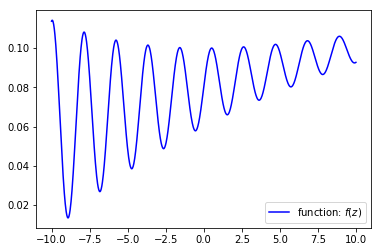

In [5]:
z = np.linspace(-10,10,1000)

def my_func(z):
    return 0.02*(np.exp(-0.1*z)*np.sin(3*z) + 0.1*z + 4)

f = my_func(z)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.legend()

**Case 1:** Let us sample from a uniform distribution.

$p(z) = \mathcal{U}(-8,8)$

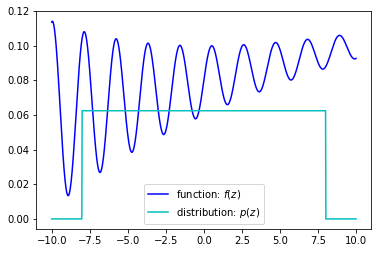

In [6]:
p = uniform_pdf(z, a=-8, b=8)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='c', label='distribution: '+r'$p(z)$')
pl.legend()

E[f]= 0.07801994578978239


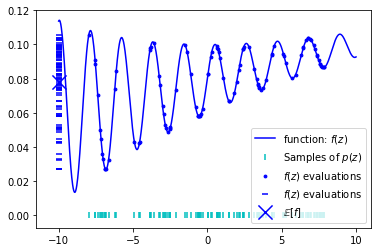

In [7]:
M = 100
z_n = np.random.uniform(-8, 8, size=M) # Step 1: draw a sample from p.
f_z_n = my_func(z_n) # Step 2: evaluate f on samples of z.
E_f = np.average(f_z_n) # Step 3: compute the average. 
print('E[f]=', E_f)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $p(z)$')
pl.scatter(z_n, f_z_n, c='b', s=8, label=r'$f(z)$ evaluations')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c='b', marker='_', label=r'$f(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.legend()

**Case 2:** Let us sample from a narrow normal distribution.

$p(z) = \mathcal{N}(-2,0.1)$

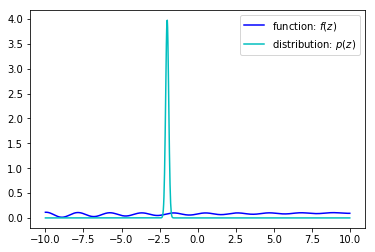

In [8]:
p = normal_pdf(z, mu=-2, sigma=0.1)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='c', label='distribution: '+r'$p(z)$')
pl.legend()

E[f]= 0.07386639762751349


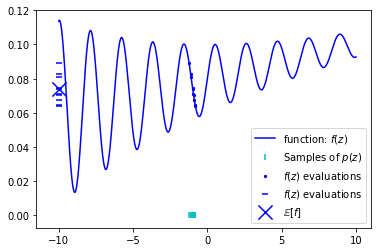

In [9]:
M =10
z_n = np.random.normal(loc=-1, scale=0.1, size=N) # Step 1: draw a sample from p.
f_z_n = my_func(z_n) # Step 2: evaluate f on samples of z.
E_f = np.average(f_z_n) # Step 3: compute the average. 
print('E[f]=', E_f)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $p(z)$')
pl.scatter(z_n, f_z_n, c='b', s=5, label=r'$f(z)$ evaluations')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c='b', marker='_', label=r'$f(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.legend()

**Case 3:** Let us sample from a wide normal distribution.

$p(z) = \mathcal{N}(-3, 2)$

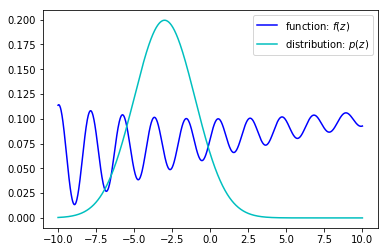

In [10]:
p = normal_pdf(z, mu=-3, sigma=2)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='c', label='distribution: '+r'$p(z)$')
pl.legend()

E[f]= 0.07770107071109934


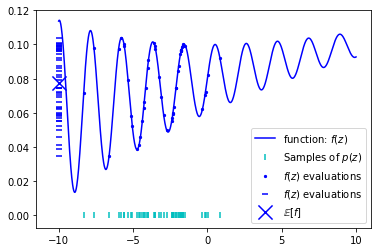

In [11]:
M =50
z_n = np.random.normal(loc=-3, scale=2, size=N) # Step 1: draw a sample from p.
f_z_n = my_func(z_n) # Step 2: evaluate f on samples of z.
E_f = np.average(f_z_n) # Step 3: compute the avberage. 
print('E[f]=', E_f)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $p(z)$')
pl.scatter(z_n, f_z_n, c='b', s=5, label=r'$f(z)$ evaluations')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c='b', marker='_', label=r'$f(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.legend()

## Importance sampling

What if we don't know the distribution $p(z)$, but we can evaluate it. Because we don't know $p(z)$, we can't sample from it. Therefore, we introduce a *proposal distribution* whose form is known and hence we can sample from it.

\begin{align}
    \mathbb{E}[f] &= \int f(z)p(z) \mathrm{d}z \\ 
    &= \int f(z) \frac{p(z)}{q(z)} q(z) \mathrm{d}z \\
    &= \frac{1}{M} \sum_{m=1}^{M} \frac{p(z^{(m)})}{q(z^{(m)})} f(z^{(m)}) 
\end{align}

where $z^{(m)}$ are samples drawn from $q(z)$. This involves 5 steps,
* Step 1: Draw samples $z_m$ from $q(z)$
* Step 2: Evaluate $q(z_m)$
* Step 3: Evaluate $p(z_m)$
* Step 4: Evaluate $f(z_m)$
* Step 5: Compute the weighted average of $f(z_m)$ with the weights $p(z_m)/q(z_m)$.

**Case 1:** 

$p(z) = \mathcal{N}(-3, 2)$ Let us pretend we can't sample from this, but we can evaluate the probability density.

$q(z) = \mathcal{N}(-3, 3)$ Let us sample from a wide normal distribution around $p(z)$.

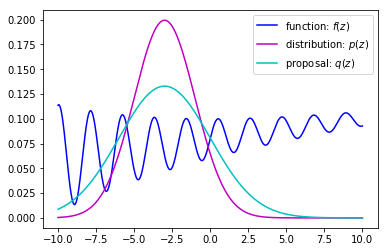

In [12]:
q_mu, q_sig = -3, 3

f = my_func(z)
p = normal_pdf(z, mu=-3, sigma=2)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend()

E[f]= 0.08234606731049533


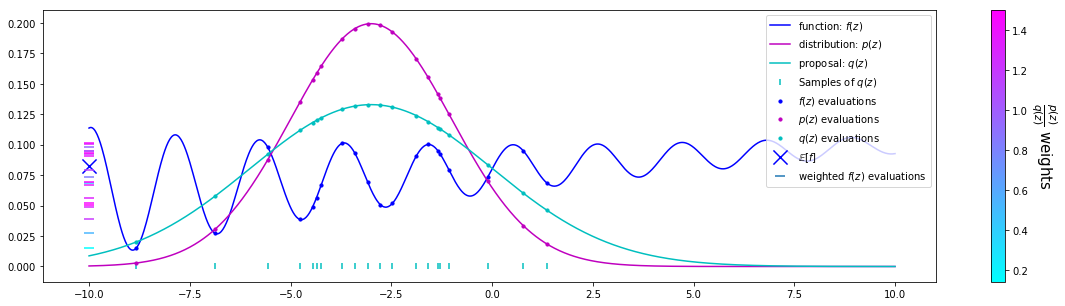

In [13]:
M =20
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = normal_pdf(z_n, mu=-3, sigma=2) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage. 
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1)

**Case 2:** 

$p(z) = \mathcal{N}(-3, 2)$ Let us pretend we can't sample from this, but we can evaluate the probability density.

$q(z) = \mathcal{N}(3, 3)$ Let us sample from a distribution completely off from $p(z)$.

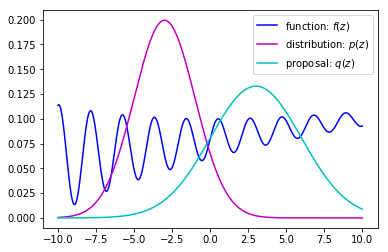

In [14]:
q_mu, q_sig = 3, 3

f = my_func(z)
p = normal_pdf(z, mu=-3, sigma=2)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend()

E[f]= 0.11863712445510448


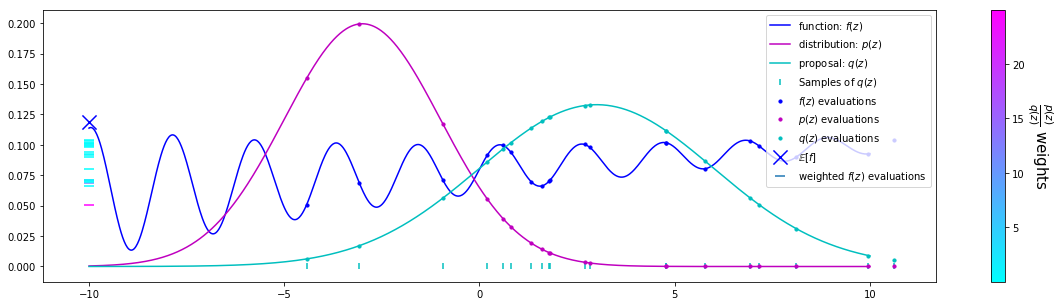

In [15]:
M =20
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = normal_pdf(z_n, mu=-3, sigma=2) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage. 
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1)

**Case 3:** 

$p(z) = \mathcal{N}(-3, 2)$ Let us pretend we can't sample from this, but we can evaluate the probability density.

$q(z) = \mathcal{N}(-3, 3)$ Let us sample from a distribution exactly the same as $p(z)$. It is not possible to pick such $q(z)$ in practice. However, let us assume this happened by chance. In this case, weights are $1$ because $p(z_m)=q(z_m)$. Further, we expect results to be similar to case 3 in section 1.

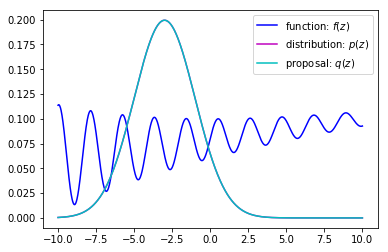

In [16]:
q_mu, q_sig = -3, 2

f = my_func(z)
p = normal_pdf(z, mu=-3, sigma=2)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend()

E[f]= 0.0707818441263635


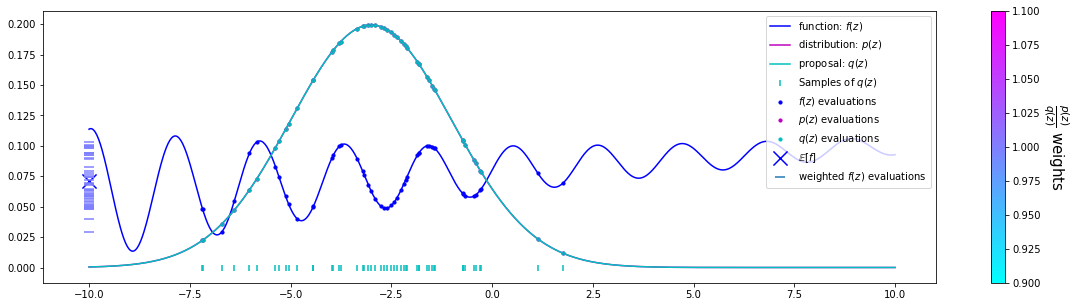

In [17]:
M =50
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = normal_pdf(z_n, mu=-3, sigma=2) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage. 
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1)

**Case 4:** 
$p(z)$ - Let this be a complex pdf that we can't sample, but we can evaluate.

$q(z) = \mathcal{N}(-1, 3)$ Let us pick a proposal wide enough. 

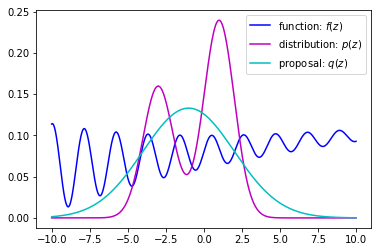

In [18]:
q_mu, q_sig = -1, 3

f = my_func(z)
p = unknown_pdf(z)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend()

E[f]= 0.06555885892971125


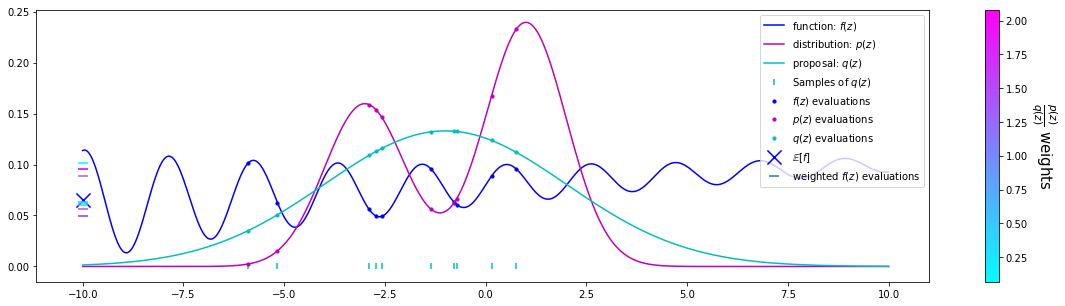

In [19]:
M =10
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = unknown_pdf(z_n) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage. 
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1)

**Case 5:** 
$p(z)$ - Let this be a complex pdf that we can't sample, but we can evaluate.

$q(z) = \mathcal{N}(0, 0.5)$ How about a narrow proposal?

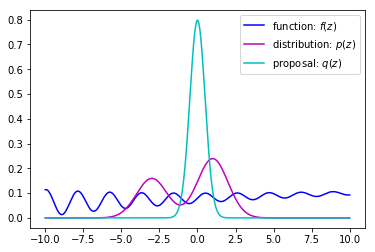

In [20]:
q_mu, q_sig = 0, 0.5

f = my_func(z)
p = unknown_pdf(z)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend()

E[f]= 0.06896066169198925


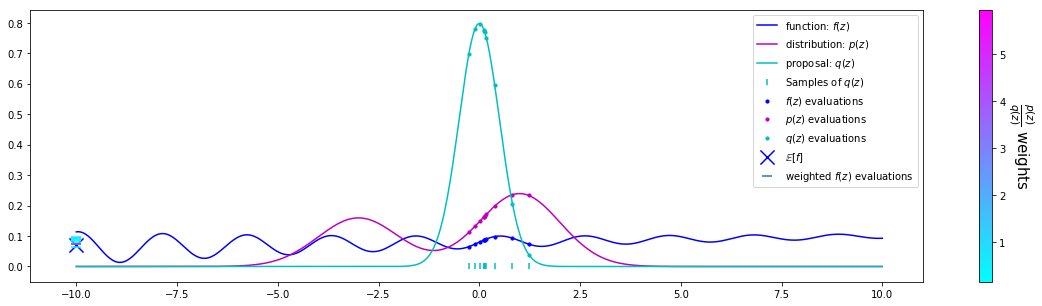

In [21]:
M =10
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = unknown_pdf(z_n) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage. 
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1)

This estimation is not good enough because the entire $p(z)$ distribution has not been explored. 

### 3. What if p(z) can only be evaluated up to a normalization constant. Bayesian learning. 

In [22]:
#TBD